<a href="https://colab.research.google.com/github/min02yam/R-study/blob/main/20220515_%EB%B6%84%EB%A5%98%EB%B6%84%EC%84%9D_weatherAUS_%ED%95%98%EB%8A%94%EC%A4%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
05150120
1.타겟벨런스홗인
2.모델링

--------------------------------------------------------------------------
### **2. (분류분석) weatherAUS 데이터 셋을 활용하여**
#### 2-1 데이터 요약 값을 보고 NA값이 10,000개 이상인 열을 제외하고 남은 변수중 NA값이 있는 행을 제거하시오
#### 2-2 그리고 AUS 데이터의 Date변수를 Date형으로 변환하고, 전처리가 된 weatherAUS 데이터를 train(70%), test(30%)로 분할하시오 (set.seed(6789))
####2-3 train 데이터로 RainTomorrow를 예측하는 분류모델을 1개 생성하고, test데이터에 대한 예측값을 csv 파일로 제출 하시오
--------------------------------------------------------------------------

---------------------------**목차**---------------------------
1. 패키지 및 데이터 로드
2. 데이터 전처리 (2-1), (2-2)
3. 모델링<br>


## 1. 패키지 및 데이터 로드

In [ ]:
install.packages(c("kernlab","caret"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
library(dplyr)
library(kernlab) #SVM
library(caret) #parameter tuning


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:kernlab’:

    alpha


Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [ ]:
install.packages("DataExplorer"); library(DataExplorer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘htmlwidgets’, ‘igraph’, ‘gridExtra’, ‘networkD3’




In [ ]:
df<-read.csv("/content/weatherAUS.csv")

In [ ]:
#간단 구조 확인
str(df)
summary(df)

'data.frame':	142193 obs. of  21 variables:
 $ Date         : chr  "2008-12-01" "2008-12-02" "2008-12-03" "2008-12-04" ...
 $ Location     : chr  "Albury" "Albury" "Albury" "Albury" ...
 $ MinTemp      : num  13.4 7.4 12.9 9.2 17.5 14.6 14.3 7.7 9.7 13.1 ...
 $ MaxTemp      : num  22.9 25.1 25.7 28 32.3 29.7 25 26.7 31.9 30.1 ...
 $ Rainfall     : num  0.6 0 0 0 1 0.2 0 0 0 1.4 ...
 $ WindGustDir  : chr  "W" "WNW" "WSW" "NE" ...
 $ WindGustSpeed: int  44 44 46 24 41 56 50 35 80 28 ...
 $ WindDir9am   : chr  "W" "NNW" "W" "SE" ...
 $ WindDir3pm   : chr  "WNW" "WSW" "WSW" "E" ...
 $ WindSpeed9am : int  20 4 19 11 7 19 20 6 7 15 ...
 $ WindSpeed3pm : int  24 22 26 9 20 24 24 17 28 11 ...
 $ Humidity9am  : int  71 44 38 45 82 55 49 48 42 58 ...
 $ Humidity3pm  : int  22 25 30 16 33 23 19 19 9 27 ...
 $ Pressure9am  : num  1008 1011 1008 1018 1011 ...
 $ Pressure3pm  : num  1007 1008 1009 1013 1006 ...
 $ Cloud9am     : int  8 NA NA NA 7 NA 1 NA NA NA ...
 $ Cloud3pm     : int  NA NA 2 NA 8

     Date             Location            MinTemp         MaxTemp     
 Length:142193      Length:142193      Min.   :-8.50   Min.   :-4.80  
 Class :character   Class :character   1st Qu.: 7.60   1st Qu.:17.90  
 Mode  :character   Mode  :character   Median :12.00   Median :22.60  
                                       Mean   :12.19   Mean   :23.23  
                                       3rd Qu.:16.80   3rd Qu.:28.20  
                                       Max.   :33.90   Max.   :48.10  
                                       NA's   :637     NA's   :322    
    Rainfall      WindGustDir        WindGustSpeed     WindDir9am       
 Min.   :  0.00   Length:142193      Min.   :  6.00   Length:142193     
 1st Qu.:  0.00   Class :character   1st Qu.: 31.00   Class :character  
 Median :  0.00   Mode  :character   Median : 39.00   Mode  :character  
 Mean   :  2.35                      Mean   : 39.98                     
 3rd Qu.:  0.80                      3rd Qu.: 48.00                

1. 총 142193 관측치와 21차원
2. 이때, 입력피처는 20개이고 타겟은 "RainTomorrow"이다
3. 이진분류
4. 연속형 피처 14개, 범주형 피처6개
5. NA 다수 존재 

## 2. 데이터 전처리 

2-1 데이터 요약 값을 보고 NA값이 10,000개 이상인 열을 제외하고 남은 변수중 NA값이 있는 행을 제거하시오

In [ ]:
#which(colSums(is.na(df))>=10000)
df<-df[,-which(colSums(is.na(df))>=10000) ]

In [ ]:
str(df);summary(df) # 확인

'data.frame':	142193 obs. of  16 variables:
 $ Date         : chr  "2008-12-01" "2008-12-02" "2008-12-03" "2008-12-04" ...
 $ Location     : chr  "Albury" "Albury" "Albury" "Albury" ...
 $ MinTemp      : num  13.4 7.4 12.9 9.2 17.5 14.6 14.3 7.7 9.7 13.1 ...
 $ MaxTemp      : num  22.9 25.1 25.7 28 32.3 29.7 25 26.7 31.9 30.1 ...
 $ Rainfall     : num  0.6 0 0 0 1 0.2 0 0 0 1.4 ...
 $ WindGustDir  : chr  "W" "WNW" "WSW" "NE" ...
 $ WindGustSpeed: int  44 44 46 24 41 56 50 35 80 28 ...
 $ WindDir3pm   : chr  "WNW" "WSW" "WSW" "E" ...
 $ WindSpeed9am : int  20 4 19 11 7 19 20 6 7 15 ...
 $ WindSpeed3pm : int  24 22 26 9 20 24 24 17 28 11 ...
 $ Humidity9am  : int  71 44 38 45 82 55 49 48 42 58 ...
 $ Humidity3pm  : int  22 25 30 16 33 23 19 19 9 27 ...
 $ Temp9am      : num  16.9 17.2 21 18.1 17.8 20.6 18.1 16.3 18.3 20.1 ...
 $ Temp3pm      : num  21.8 24.3 23.2 26.5 29.7 28.9 24.6 25.5 30.2 28.2 ...
 $ RainToday    : chr  "No" "No" "No" "No" ...
 $ RainTomorrow : chr  "No" "No" "No" "N

     Date             Location            MinTemp         MaxTemp     
 Length:142193      Length:142193      Min.   :-8.50   Min.   :-4.80  
 Class :character   Class :character   1st Qu.: 7.60   1st Qu.:17.90  
 Mode  :character   Mode  :character   Median :12.00   Median :22.60  
                                       Mean   :12.19   Mean   :23.23  
                                       3rd Qu.:16.80   3rd Qu.:28.20  
                                       Max.   :33.90   Max.   :48.10  
                                       NA's   :637     NA's   :322    
    Rainfall      WindGustDir        WindGustSpeed     WindDir3pm       
 Min.   :  0.00   Length:142193      Min.   :  6.00   Length:142193     
 1st Qu.:  0.00   Class :character   1st Qu.: 31.00   Class :character  
 Median :  0.00   Mode  :character   Median : 39.00   Mode  :character  
 Mean   :  2.35                      Mean   : 39.98                     
 3rd Qu.:  0.80                      3rd Qu.: 48.00                

In [ ]:
df<-na.omit(df); summary(df)

     Date             Location            MinTemp         MaxTemp     
 Length:128576      Length:128576      Min.   :-8.50   Min.   :-4.80  
 Class :character   Class :character   1st Qu.: 7.50   1st Qu.:17.90  
 Mode  :character   Mode  :character   Median :11.90   Median :22.80  
                                       Mean   :12.14   Mean   :23.31  
                                       3rd Qu.:16.80   3rd Qu.:28.40  
                                       Max.   :33.90   Max.   :48.10  
    Rainfall       WindGustDir        WindGustSpeed     WindDir3pm       
 Min.   :  0.000   Length:128576      Min.   :  6.00   Length:128576     
 1st Qu.:  0.000   Class :character   1st Qu.: 31.00   Class :character  
 Median :  0.000   Mode  :character   Median : 39.00   Mode  :character  
 Mean   :  2.299                      Mean   : 40.06                     
 3rd Qu.:  0.600                      3rd Qu.: 48.00                     
 Max.   :367.600                      Max.   :135.00       

2-2. AUS 데이터의 Date변수를 Date형으로 변환하고

In [ ]:
library(magrittr)

In [ ]:
colnames(df)<-tolower(colnames(df)) #먼저 소문자로 바꿔주고
names(df)

[1] "date"          "location"      "mintemp"       "maxtemp"      
 [5] "rainfall"      "windgustdir"   "windgustspeed" "winddir3pm"   
 [9] "windspeed9am"  "windspeed3pm"  "humidity9am"   "humidity3pm"  
[13] "temp9am"       "temp3pm"       "raintoday"     "raintomorrow"

In [ ]:
df$date<- as.Date(df$date, tryFormats="%Y-%m-%d") #연도는 대문자
str(df)
#?as.Date # %Y-%m-%d

'data.frame':	128576 obs. of  16 variables:
 $ date         : Date, format: "2008-12-01" "2008-12-02" ...
 $ location     : chr  "Albury" "Albury" "Albury" "Albury" ...
 $ mintemp      : num  13.4 7.4 12.9 9.2 17.5 14.6 14.3 7.7 9.7 13.1 ...
 $ maxtemp      : num  22.9 25.1 25.7 28 32.3 29.7 25 26.7 31.9 30.1 ...
 $ rainfall     : num  0.6 0 0 0 1 0.2 0 0 0 1.4 ...
 $ windgustdir  : chr  "W" "WNW" "WSW" "NE" ...
 $ windgustspeed: int  44 44 46 24 41 56 50 35 80 28 ...
 $ winddir3pm   : chr  "WNW" "WSW" "WSW" "E" ...
 $ windspeed9am : int  20 4 19 11 7 19 20 6 7 15 ...
 $ windspeed3pm : int  24 22 26 9 20 24 24 17 28 11 ...
 $ humidity9am  : int  71 44 38 45 82 55 49 48 42 58 ...
 $ humidity3pm  : int  22 25 30 16 33 23 19 19 9 27 ...
 $ temp9am      : num  16.9 17.2 21 18.1 17.8 20.6 18.1 16.3 18.3 20.1 ...
 $ temp3pm      : num  21.8 24.3 23.2 26.5 29.7 28.9 24.6 25.5 30.2 28.2 ...
 $ raintoday    : chr  "No" "No" "No" "No" ...
 $ raintomorrow : chr  "No" "No" "No" "No" ...
 - attr(*,

2-3. 전처리가 된 weatherAUS 데이터를 train(70%), test(30%)로 분할하시오<br> set.seed(6789)

In [ ]:
set.seed(6789)
ind<-sample(1:nrow(df), nrow(df)*0.7, replace=FALSE)
train<-df[ind,]
test<-df[-ind,]
summary(train) # 확인

      date              location            mintemp         maxtemp     
 Min.   :2007-11-02   Length:90003       Min.   :-8.20   Min.   :-4.80  
 1st Qu.:2011-01-21   Class :character   1st Qu.: 7.50   1st Qu.:17.90  
 Median :2013-06-11   Mode  :character   Median :11.90   Median :22.80  
 Mean   :2013-04-10                      Mean   :12.15   Mean   :23.31  
 3rd Qu.:2015-06-15                      3rd Qu.:16.80   3rd Qu.:28.40  
 Max.   :2017-06-25                      Max.   :33.90   Max.   :48.10  
    rainfall       windgustdir        windgustspeed     winddir3pm       
 Min.   :  0.000   Length:90003       Min.   :  6.00   Length:90003      
 1st Qu.:  0.000   Class :character   1st Qu.: 31.00   Class :character  
 Median :  0.000   Mode  :character   Median : 39.00   Mode  :character  
 Mean   :  2.304                      Mean   : 40.02                     
 3rd Qu.:  0.600                      3rd Qu.: 48.00                     
 Max.   :367.600                      Max.   

## 3. 모델링
train 데이터로 RainTomorrow를 예측하는 분류모델을 1개 생성하고, test데이터에 대한 예측값을 csv 파일로 제출 하시오

1 columns ignored with more than 50 categories.
date: 3358 categories




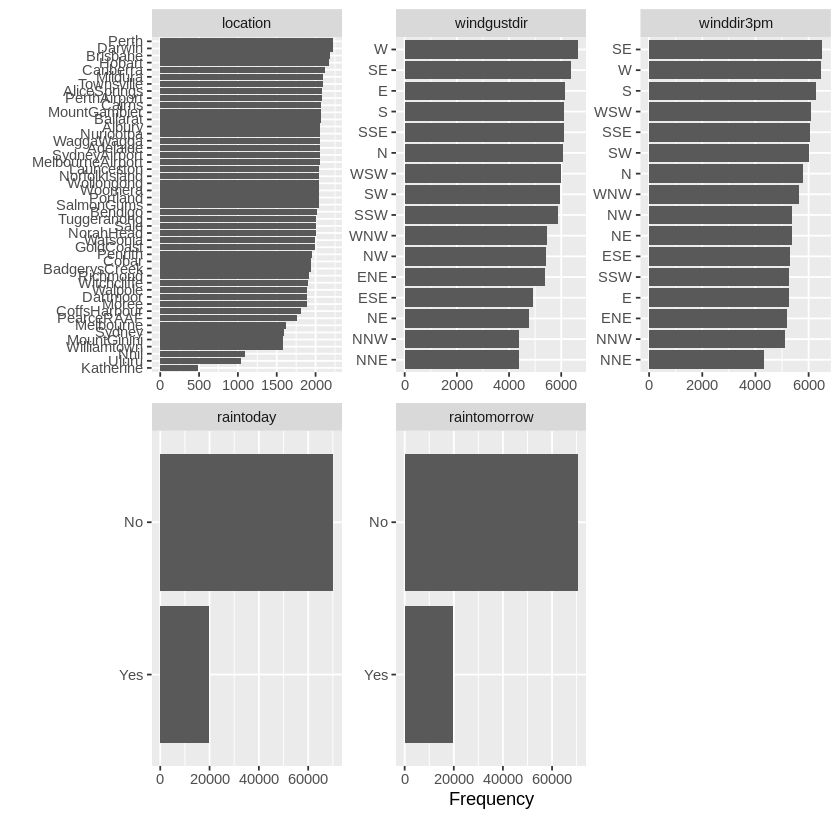

In [ ]:
#먼저 범주형 클래스 확인
plot_bar(train)

In [ ]:
nrow(table(df$location))  #최대 47클래스있음 date는 어떻게할까 ? 

[1] 47

내일 다시 랜포나 부스팅방법중 하나 선택하기